# Estudio para la tienda de videojuegos Ice

### **Introducción y descripción del proyecto**


La tienda online **Ice** que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

**Descripción de datos**
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Clasificación (ESRB)

### Librerías

Se procede a importar las librerías necesarias para llevar a cabo el estudio:

In [309]:
import pandas as pd
import scipy as sc
from scipy import stats as st
import numpy as np
import math as mt
from math import factorial as fac
import matplotlib.pyplot as plt
import seaborn

### Exploración de los datos

Se lee el conjunto de datos y se almacena en la variable llamada `games`

In [310]:
try:
  games = pd.read_csv('/content/drive/MyDrive/practicum/Proyecto integrado 1/games.csv')
except:
  games = pd.read_csv('/datasets/games.csv')

Vemos las primeras 10 columnas del `DataFrame`

In [311]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Vemos las últimas 10 columnas del `DataFrame`

In [312]:
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Se observan los tipos de datos, para determinar si es necesario realizar algún cambio

In [313]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se deben cambiar los nombres de las columnas para que los mismos estén todos en minúsculas. también se observan valores ausentes, los cuales más adelante deben de ser corregidos con el método apropiado.

Se prcede a cmabiar el nombre de las columnas

In [314]:
columns = list(games.columns)
colum = []
for i in columns:
  colum.append(i.lower())
games.columns = colum

In [315]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Como se observa, ahora los nombres se encuentran todos en minúsculas.

A continuación debemos hallar la manera de sustituir los valores ausentes en los datos, Estudiando la mejor manera según la distribución de ls mimsmos.

In [316]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Analizando columna por columna se hará lo siguiente:

* **`year_of_release:`** Como podemos ver la mediana y la media en la distribución de esta columna son bastante cercanas, lo que quiere decir que la mayoría de los juegos presentes en este conjunto de datos provieneen más o menos del 2007,Sin embargo, los juegos se lanzan en fechas muy específicas, por lo que sustituit por la mediana o la media sería un error en este caso. Por lo que se tomrá este criterio para sustituir los datos.
* **`genre:`** Se sustituirán los valores ausentes con la palabra 'desconocido'
* **`critic_score:`** para este caso, se debe estudiar más a profundidad como se distribuyen los datos, ya que es probable que según algunas variables, este Score cambie dependiendo de según qeu categoría.
* **`user_score:`** Se realizará el mismo procedimiento que con `critic_score`.
* `rating:` Hay que estudiar los valores únicos y ver si hay alguna relación que nos permita tomar decisiones de sustitución de los datos con base.

### Preprocesamiento de datos

Primeramente se ubica cual es la fecha de lanzamiento de cada juego y creamos un diccionario llamado `years_dict`

In [317]:
years = games.pivot_table(index = 'name', values = 'year_of_release')
years_dict = years.to_dict()
years_dict = years_dict.get('year_of_release')

Luego creamos un DataFrame que contenga la lista de juegos de `games` asoscidas a las nnuevas fechas

In [318]:
name_years = games.loc[:,['name','year_of_release']]
for i in years_dict.keys():
  name_years[name_years['name'] == i]= name_years[name_years['name'] == i].fillna(years_dict.get(i))



Redondeamos los valores hacia arriba

In [319]:
name_years['year_of_release'] = np.ceil(name_years['year_of_release'])

Eliminamos la columna `'year_of_release'` en `games`

In [320]:
games = games.drop(columns = 'year_of_release')

Le concatenamos la nueva columna de las fechas

In [321]:
games = pd.concat([games,name_years['year_of_release']], axis = 1)

Mostramos ahora la cantidad de ausentes

In [322]:
games[games['year_of_release'].isna()]

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release
475,wwe Smackdown vs. Raw 2006,PS2,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN
627,Rock Band,X360,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,NaN
805,Rock Band,Wii,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,NaN
1142,Rock Band,PS3,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,NaN
16288,Shorts,DS,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,NaN
16348,Agarest Senki: Re-appearance,PS3,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


Como se observa, logramos pasar de 269 ausentes a 146, por lo que ahora tenemos data de 123 juegos que antes no teníamos. Se decide dejarlo de esta forma, ya que la cantidad de ausentes es insignificante en comparación

Ahora se van a sustituir los valores ausnetes en `genre`

In [323]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [324]:
games['genre'] = games['genre'].fillna('desconocido')

In [325]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'desconocido'], dtype=object)

Una vez habiendo sustituido estos valores, se procede a ubicar la forma óptima para sustituir los valores ausentes del `'critic_score'`, Como estos valores son únicos para cada uno de los juegos, se decide sustituir los ausentes con la palabra tbd que significan 'to be determninated'

In [326]:
games['critic_score'] = games['critic_score'].fillna('tbd')

Pra estudiar como sustituir los valores ausentes en `'user_score'` se observan sus valores únicos.

In [327]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Se repite el procedimiento con la columna de `'rating'`

In [328]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

En el caso de `'user_score'`, Los ausentes será sustituidos con las siglas `'tbd'` que significan 'to be determninated', ya que no se tiene data al respecto, por lo que sería irresponsable con los datos, sacar algún tipo de favto paraq sustituir los atípicos.

Por otro lado, `'rating'`, no puede ser sustituido con ningún valor, ya que es una característica intrinseca d eun juego perse, colocar algún valor podria suponer que un juego de adults es apto para todo público.



In [329]:
games['user_score'] = games['user_score'].fillna('tbd')

Continuando, una vez los valores ausnetes fueron corregidos, se procede a realizar el calculo total de ingresos para cada uno de los juegos en las diferentes ciudades, y agreagralos en una columna adicional en al DataFrame de `games`

In [330]:
games['total_sales'] = pd.DataFrame(map(lambda na,	eu,	jp,	other: na + eu + jp + other, games['na_sales'], games['eu_sales'], games['jp_sales'], games['other_sales']))

In [331]:
games

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release,total_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,tbd,tbd,NaN,1985.0,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,tbd,tbd,NaN,1996.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,tbd,tbd,NaN,2016.0,0.01
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,tbd,tbd,NaN,2006.0,0.01
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,tbd,tbd,NaN,2016.0,0.01
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,tbd,tbd,NaN,2003.0,0.01


**Conclusión intermedia**

Una vez ya tratados todos los ausentes del DataSet, tenemos unos datos mucho más limpios para analizar. Así mismo, contamos con una columna que nos dá el total de ingresos de los videojuegos, información que será de mucha utilizadad y necesidad para el resto del anaálisis.

### Análisis de los datos

Primeramete, se quiere observar cuantos juegos fueron lanzados en cada año, para ello se decide utilizar un lineplot contando las entradas de cada uno de los años.

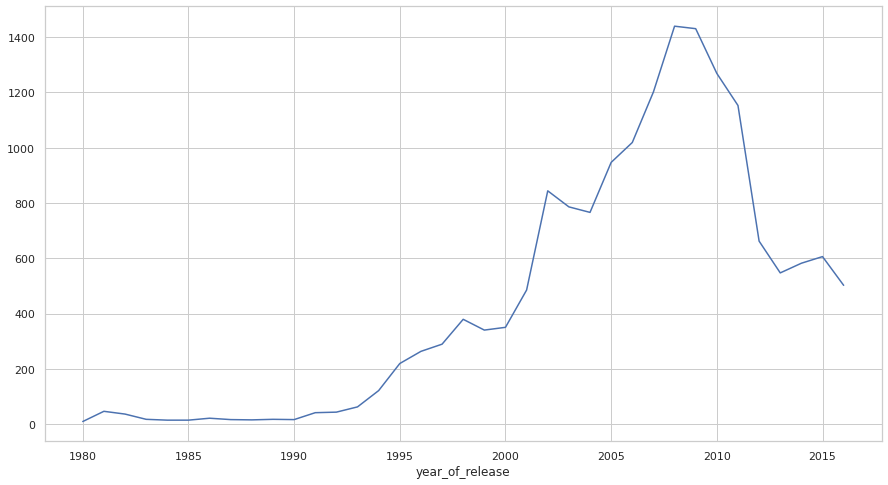

In [332]:
fig, ax = plt.subplots(figsize = (15, 8))
games.groupby('year_of_release')['year_of_release'].count().plot()

plt.show()

Como se observa, El auge de los videojuegos comienza aproximadamente a medidos de los 90, llegando a su punto máximo al rededor del 2008 y de allí disminuyendo poco a poco hasta el 2016. Esto arroja un indicio, de que los datos deberían de truncarse despúes de estos años, para poder obtener un mejor resultado al final.

Con la final de poder graficar una distribución de los ventas basadas en las cosolas y en los años para poder determinar las plataformas que solían ser populares pero que ahora no tienen ventas y ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? realizamos el siguiente gráfico

In [333]:
G = games.pivot_table(index = ['platform','year_of_release'], values ='total_sales', aggfunc = ['sum'])
G = G.reset_index()
G.columns = ['platform','year_of_release', 'total_sales_year']


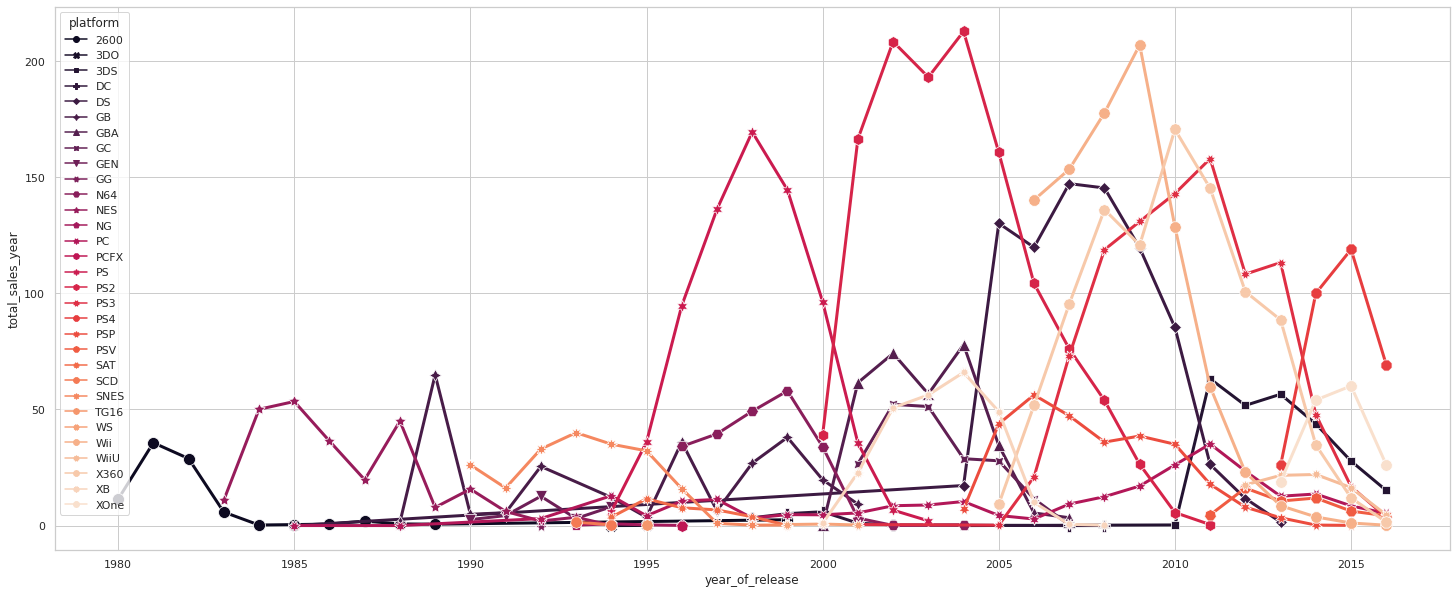

In [334]:
fig, ax = plt.subplots(figsize = (25, 10))
seaborn.lineplot(data = G, x = 'year_of_release', y =  'total_sales_year', hue = 'platform', style = 'platform', markers=True, lw=3,  dashes=False, ms = 12, palette = "rocket" )
plt.show()

Sin embargo, hay demasiadas consolas, y es muy dificil de leer, así mismo, toma en cuenta demasiados años que no nos interesan ya que no fueron tan relevantes, es por ello que se realizarán los siguinetes pasos:

1. Se buscan las ventas totales por plataforma
2. Con la función merge, se agregaran como una nueva columna que nos permita truncar la tabla, para solo ver plataformas que tengasn mas de 100M de ventas, y que de esta forma sean más relevantes.
3. Se trunca por años, para solo ver plataformas despues de 1995

In [335]:
G2 = games.pivot_table(index = ['platform'], values ='total_sales', aggfunc = ['sum'])
G2.columns = ['total_sales_platform']
G2.sort_values(by = 'total_sales_platform', ascending = False)

,total_sales_platform
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Se aplica el Merge, y se crea la tabla `G_truncado` para luego graficar




In [336]:
G = G.merge(G2, on = 'platform')
G_truncado = G[G['total_sales_platform'] > 100].sort_values('year_of_release')

Se procede a graficar

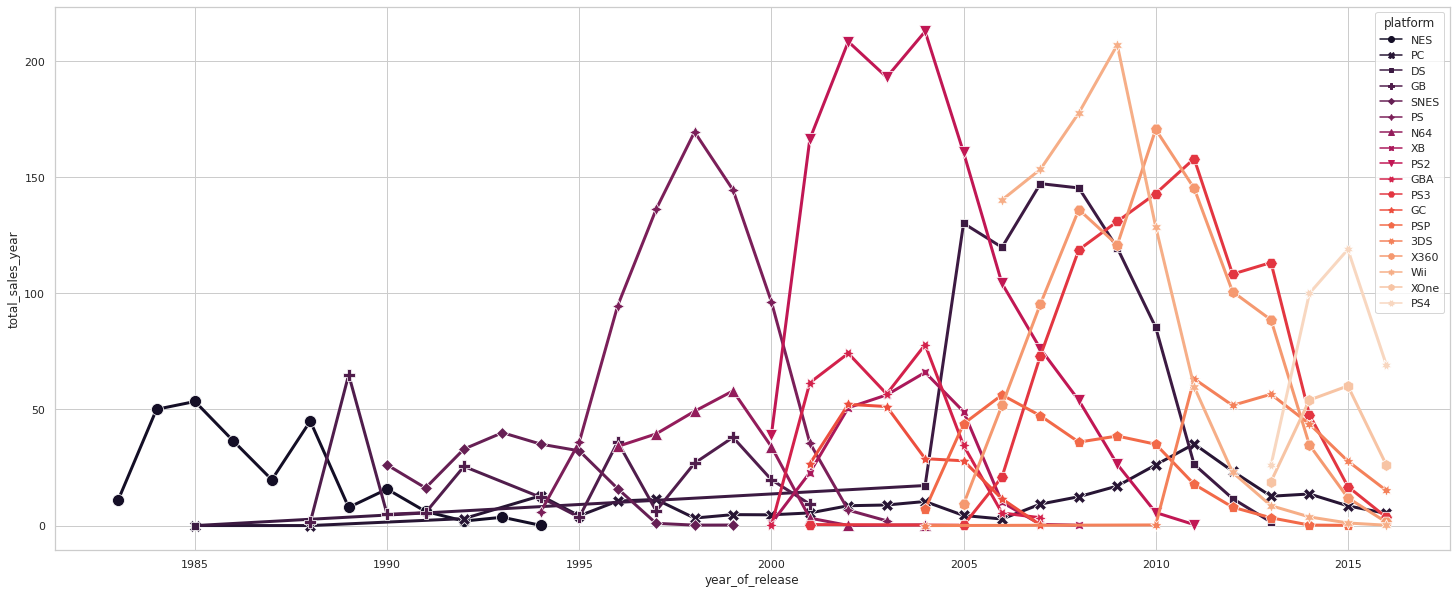

In [337]:
fig, ax = plt.subplots(figsize = (25, 10))
seaborn.lineplot(data = G_truncado, x = 'year_of_release', y =  'total_sales_year', hue = 'platform', style = 'platform', markers=True, lw=3,  dashes=False, ms = 12, palette = "rocket" )
plt.show()

Ya es un tanto más legible, sin embargo, ahora podemos truncar el año

In [338]:
G_truncado_fecha = G_truncado[G_truncado['year_of_release']>=1995]

Graficamos

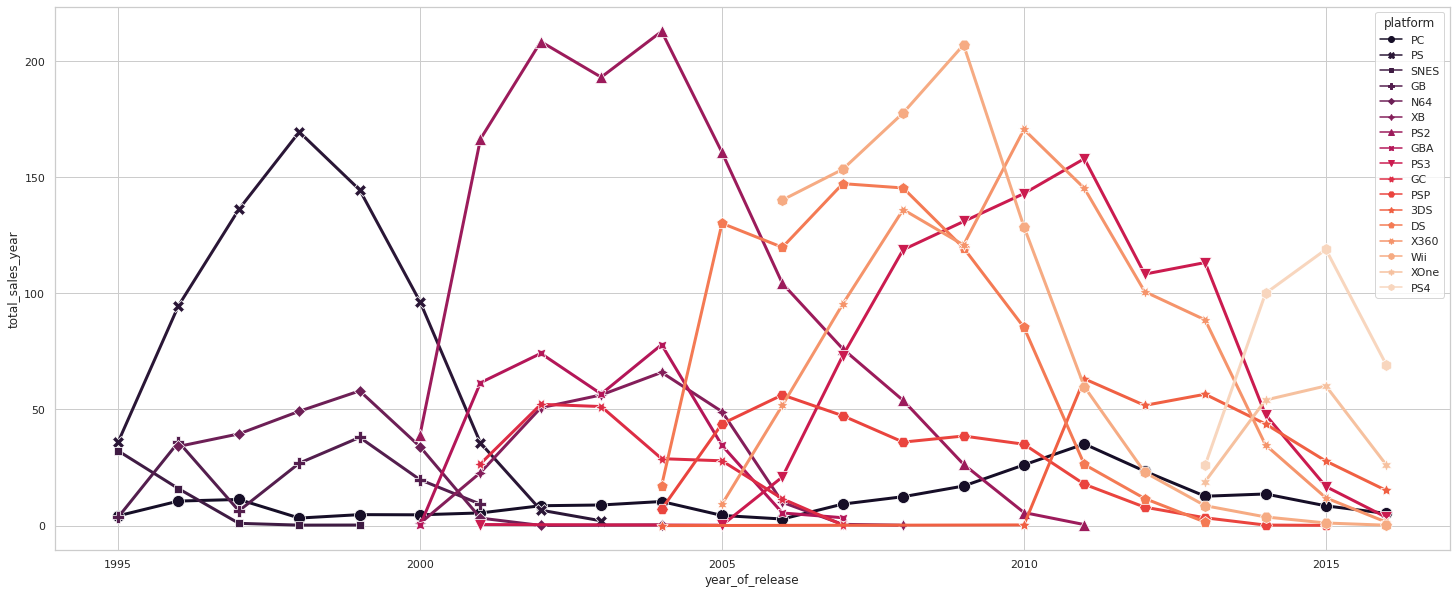

In [339]:
fig, ax = plt.subplots(figsize = (25, 10))
seaborn.lineplot(data = G_truncado_fecha, x = 'year_of_release', y =  'total_sales_year', hue = 'platform', style = 'platform', markers=True, lw=3,  dashes=False, ms = 12, palette = "rocket")
plt.show()

Ahora se puede observar claramnete cuales son las consolas qeu mayor auge y exito, así como sus periodos de vida.

Por ejemplo, el PS, tuvo un gran exito, llegando a alcanzar los 170M de ventas en 1997 aproximadamente, sin embargo, tya para los 2000 habia perdido popularidad hasta el 2003 cuando dejó practicamet de venderse, un periodo de vida de 6años.

Por otro lado tenemos el PS2, que inició en los 2000, y tuvo un gran auge hasta el 2004 superando ventas de 200M, luego cayo hasta desaparecer en el 2011 aproximadamente, con un periodo de vida de unos 6años con buenas vantas y 0tros 4años no tan buenos, dando un total de 10años, (el más longevo, sin contar el PC)

El PC, vemos que se ha mantenido con el tiempo, y esto tiene sentido, ya que es una herrameinta de trabajo que mucho han optado como forma de entretenimiento, pero al no ser su función principal, puede mantenerse en el tiempo sin perder popularidad. 

El DS por su lado tuvo su auge en el 2004, y comenzó a decender a partir del 2007 hasta practicamente agotar enbtas para el 2012. Unos 5 años de vida.

Así mismo el Xbox 360 junto con el PS3 vieron más o menos el mismo auge, siendo competenciaa directa durate esos años desde el 2005, hasta aproximadamente 2015, cuando la salida de nuevas consolas como el PS4 y el XboxOne los sacaron del mercado.

Se pronostica entonces que para el 2017 debe haber un auge de estas dos últimas consolas.




Ahora bien se crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

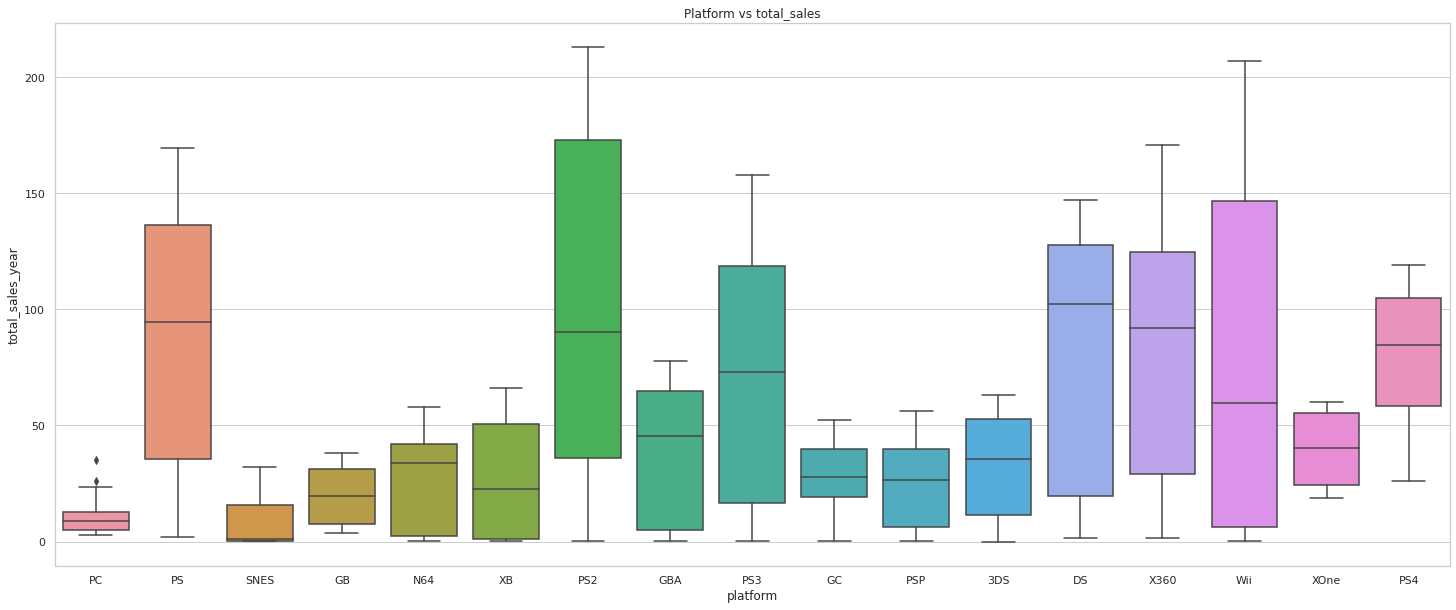

,year_of_release,total_sales_year,total_sales_platform
count,161.000000,161.000000,161.000000
mean,2006.347826,49.835901,543.850870
std,5.920579,54.268248,360.085602
min,1995.000000,0.020000,159.320000
25%,2002.000000,7.060000,259.000000
50%,2006.000000,28.820000,294.050000
75%,2011.000000,73.190000,907.510000
max,2016.000000,212.760000,1255.770000


In [340]:
fig, ax = plt.subplots(figsize = (25, 10))
seaborn.set(style='whitegrid')

seaborn.boxplot(x=G_truncado_fecha['platform'],
                y=G_truncado_fecha['total_sales_year'])
plt.title(f'Platform vs total_sales')
plt.show()


G_truncado_fecha.describe()

En el diagrama enterior, podemos observar primeramente que no hay presencia de valores atípicos, lo que sugiere que los datos fueron truncados adecuadamente.

Se puede observar que en cuanto a las ventas, hay muy pocas consolas que superan la media total, que es de 50M al año, y estas son:

1. PS
2. PS2
3. DS
4. Xbox 360
5. PS3
6. WII
7. PS4

El resto de consolas están por debajo de la media, siendo estas entonces las más rentables, Si analizamos, su mediana tambíen esta por encima de este valor, confiemando que más del 50% de la distribuación esta por encima de la media en estas consolas. Unas diferencias bastantes significativas.

La nintendo Wii quizás es la única de este top cuyuya mediana revasa por muy poco la media de las ventas, esto quizas se deba a que tubo una puularidad basante volatil como lo vios en gráficos anteriores. 

Por últio, vemos el gran potencial de crecieminto que tiene la PS4 para el año 2017, yua que en corto tiempo posiciona sus ventas muy por encima de la media.


Para estuadia como las criticas de los surarios y profecionales afectan las ventas de determinados juego, se procede a realizar un gráfico de dispersión que permita estudiar la relación entre ambas.

Para ello se toma como referencia el PS2, ya que fué el que se mantuvo por ás tiempo del conjunto de datos y el que obtuvo las mayores ventas.

In [341]:
game_user_score = games[games['user_score'] != 'tbd']
game_user_score = game_user_score[game_user_score['critic_score'] != 'tbd']
game_user_score['user_score'] = game_user_score['user_score'].astype(float)
game_user_score['critic_score'] = game_user_score['critic_score'].astype(float)

<ipython-input-341-e6446d332aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_user_score['user_score'] = game_user_score['user_score'].astype(float)
<ipython-input-341-e6446d332aa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_user_score['critic_score'] = game_user_score['critic_score'].astype(float)


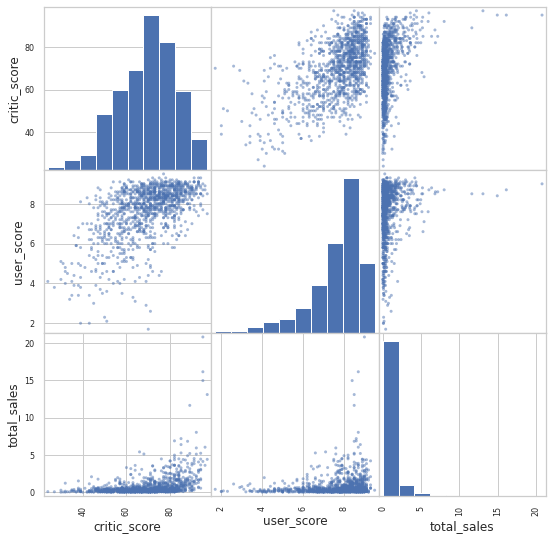

,critic_score,user_score,total_sales
critic_score,1.000000,0.563254,0.38922
user_score,0.563254,1.000000,0.16942
total_sales,0.389220,0.169420,1.00000


In [342]:
game_user_score_PS2 = game_user_score[game_user_score['platform']== 'PS2']

pd.plotting.scatter_matrix(game_user_score_PS2.loc[:,['critic_score','user_score','total_sales']], figsize=(9, 9))
plt.show()

game_user_score_PS2.loc[:,['critic_score','user_score','total_sales']].corr()

Como se puede observar en la gráfica, en el caso de las ventas totales y la puntuación otorgada por los profecionales, existe una correlación positiva baja, casi moderada, que aunque si afecta, no es demasiado determinante, sin embargo vemos que si es determiannte para influenciar la opinión de los usuarios, ya que entre `user_score` y `critic_score` existe una correlación positiva moderda. Sin embargo la puntuación del usurio `user_score` tiene una correlación positiva muy baja con el precio, pudiendo concluir que estas fariables afectan moderadamente en el tema de las ventas al menso en el caso del PS2.


Ahora, se procede a comparar y repetir el procedimiento con otras consolas que hayan jugado los mimsos juegos, para estudiar sus correlaciones y ver si no es un caso puntual.

In [343]:
games_like_PS2 = game_user_score_PS2.loc[:,['name','genre']].merge(game_user_score, on = 'name', how = 'inner')
PS3 = games_like_PS2[games_like_PS2['platform'] == 'PS3']
X360 = games_like_PS2[games_like_PS2['platform'] == 'X360']
DS = games_like_PS2[games_like_PS2['platform'] == 'DS']

Primeramente se realiza el análisis pra todas las consolas que tengan los mismos juegos que en el caso de PS2

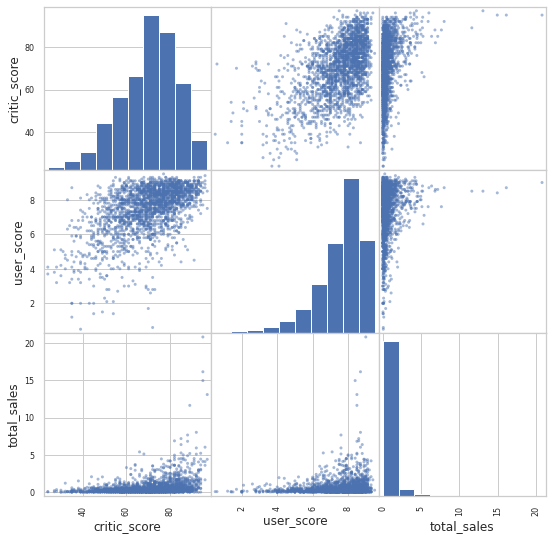

,critic_score,user_score,total_sales
critic_score,1.000000,0.538854,0.313202
user_score,0.538854,1.000000,0.146571
total_sales,0.313202,0.146571,1.000000


In [344]:
pd.plotting.scatter_matrix(games_like_PS2.loc[:,['critic_score','user_score','total_sales']], figsize=(9, 9))
plt.show()

games_like_PS2.loc[:,['critic_score','user_score','total_sales']].corr()

Nuevamente podemos concluir lo mismo que en le caso anterior, una correlación positiva baja, que no influye deasiado en el precio de los videojuegos y las ventas en determinada consola.



Realizamos el análisis con la PS3

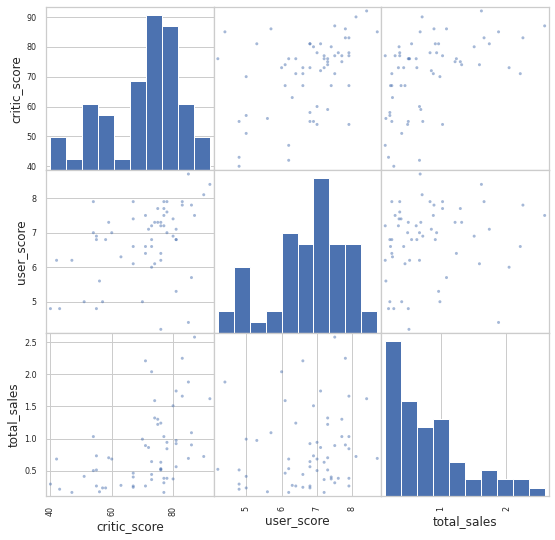

,critic_score,user_score,total_sales
critic_score,1.000000,0.437085,0.491796
user_score,0.437085,1.000000,0.156076
total_sales,0.491796,0.156076,1.000000


In [345]:
pd.plotting.scatter_matrix(PS3.loc[:,['critic_score','user_score','total_sales']], figsize=(9, 9))
plt.show()

PS3.loc[:,['critic_score','user_score','total_sales']].corr()

EN este caso, la correlación entre la opinión experta y el total de las ventas, asciende a ser una correlación positiva moderada, siendo más importante en este caso estas opiniones, que lo que se habia estudiado anterioemente.

Estudiando ahora el Xbox 360

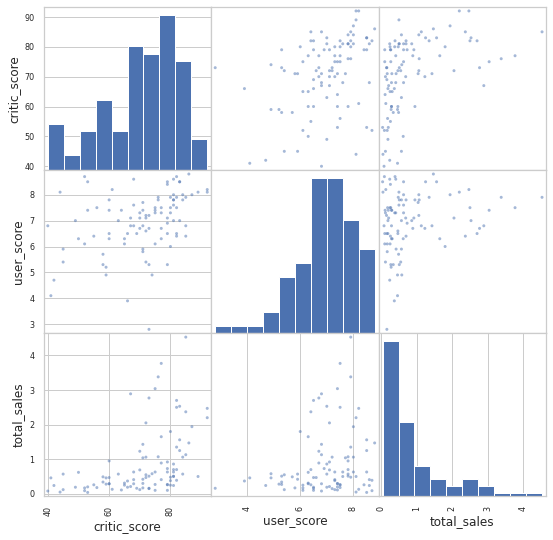

,critic_score,user_score,total_sales
critic_score,1.000000,0.375672,0.450452
user_score,0.375672,1.000000,0.203486
total_sales,0.450452,0.203486,1.000000


In [346]:
pd.plotting.scatter_matrix(X360.loc[:,['critic_score','user_score','total_sales']], figsize=(9, 9))
plt.show()

X360.loc[:,['critic_score','user_score','total_sales']].corr()

Se evidencia nuevamente una correlación positiva moderada entre la opinión de expertos y el total de las ventas.

Por último, se estdian las ventas en DS

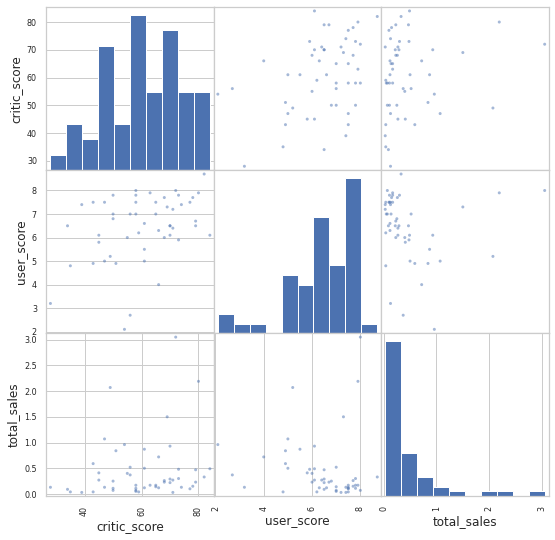

,critic_score,user_score,total_sales
critic_score,1.000000,0.384289,0.174435
user_score,0.384289,1.000000,-0.094261
total_sales,0.174435,-0.094261,1.000000


In [347]:
pd.plotting.scatter_matrix(DS.loc[:,['critic_score','user_score','total_sales']], figsize=(9, 9))
plt.show()

DS.loc[:,['critic_score','user_score','total_sales']].corr()

Este arroja el peor resultado con una correlación positiva baja en el caso de la opinón experta e incluso negativa muy baja en el caso de la de usuario.

**Conclusión intermedia**

La opinión de expertos, tiene una correlación medianamente psitiva para el aumeto de las ventas según determiandos juegos para determianda consola. Sin embargo la opinión del usuario como tal, no afecta desmasiado esta deseción. Se puede cocncluir que existen entonces otros factores más determiannates, como el tipo de plataforma, la poularidad de la misma e incluso cotexto y genero de ls video juegos

Se procede a estudiar, la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Primeramente, truncamos los datos

In [348]:
games2 = games.merge(G2, on = 'platform', how = 'inner')
games2 = games2[games2['total_sales_platform'] >100]
games2 = games2[games2['year_of_release'] >= 1995]


Ahora se realiza un gráfico que permita observar cuales son los géneros de videojuagos más vendidos.

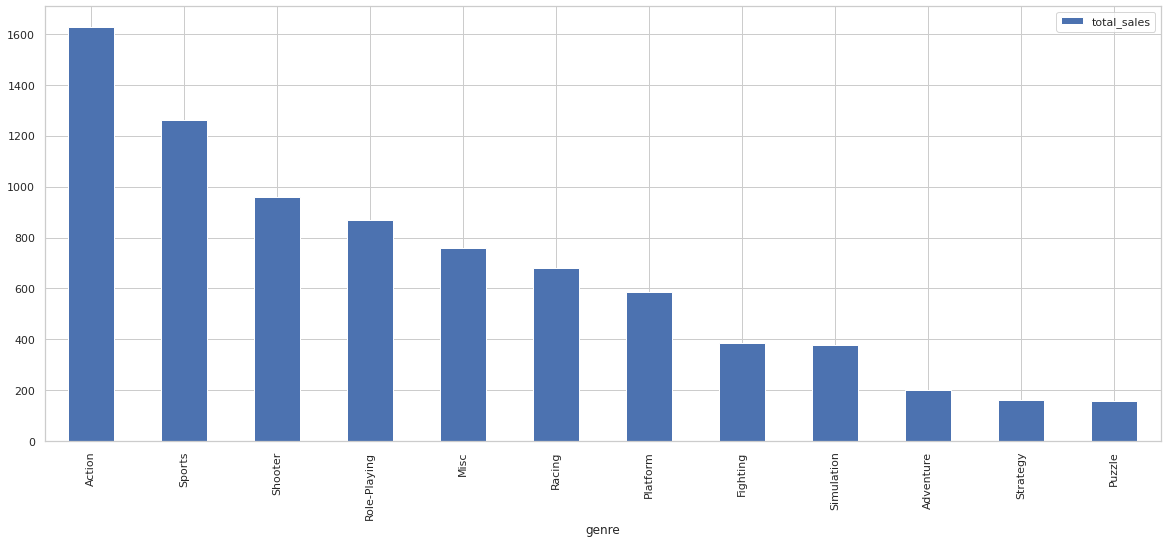

In [349]:
games2.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales' ,ascending = False).plot(kind = 'bar', figsize = (20,8))
plt.show()

Como se observa, los 5 mas vendidos son los de acción, deportes, tiro, Role-play y misc.

Se realiza una tabla pivote, la cual tien por filas el género y por columna las plataformas y como valores, las ventas totales de los juegos, par aluego graficas y determinar rentabilidades.

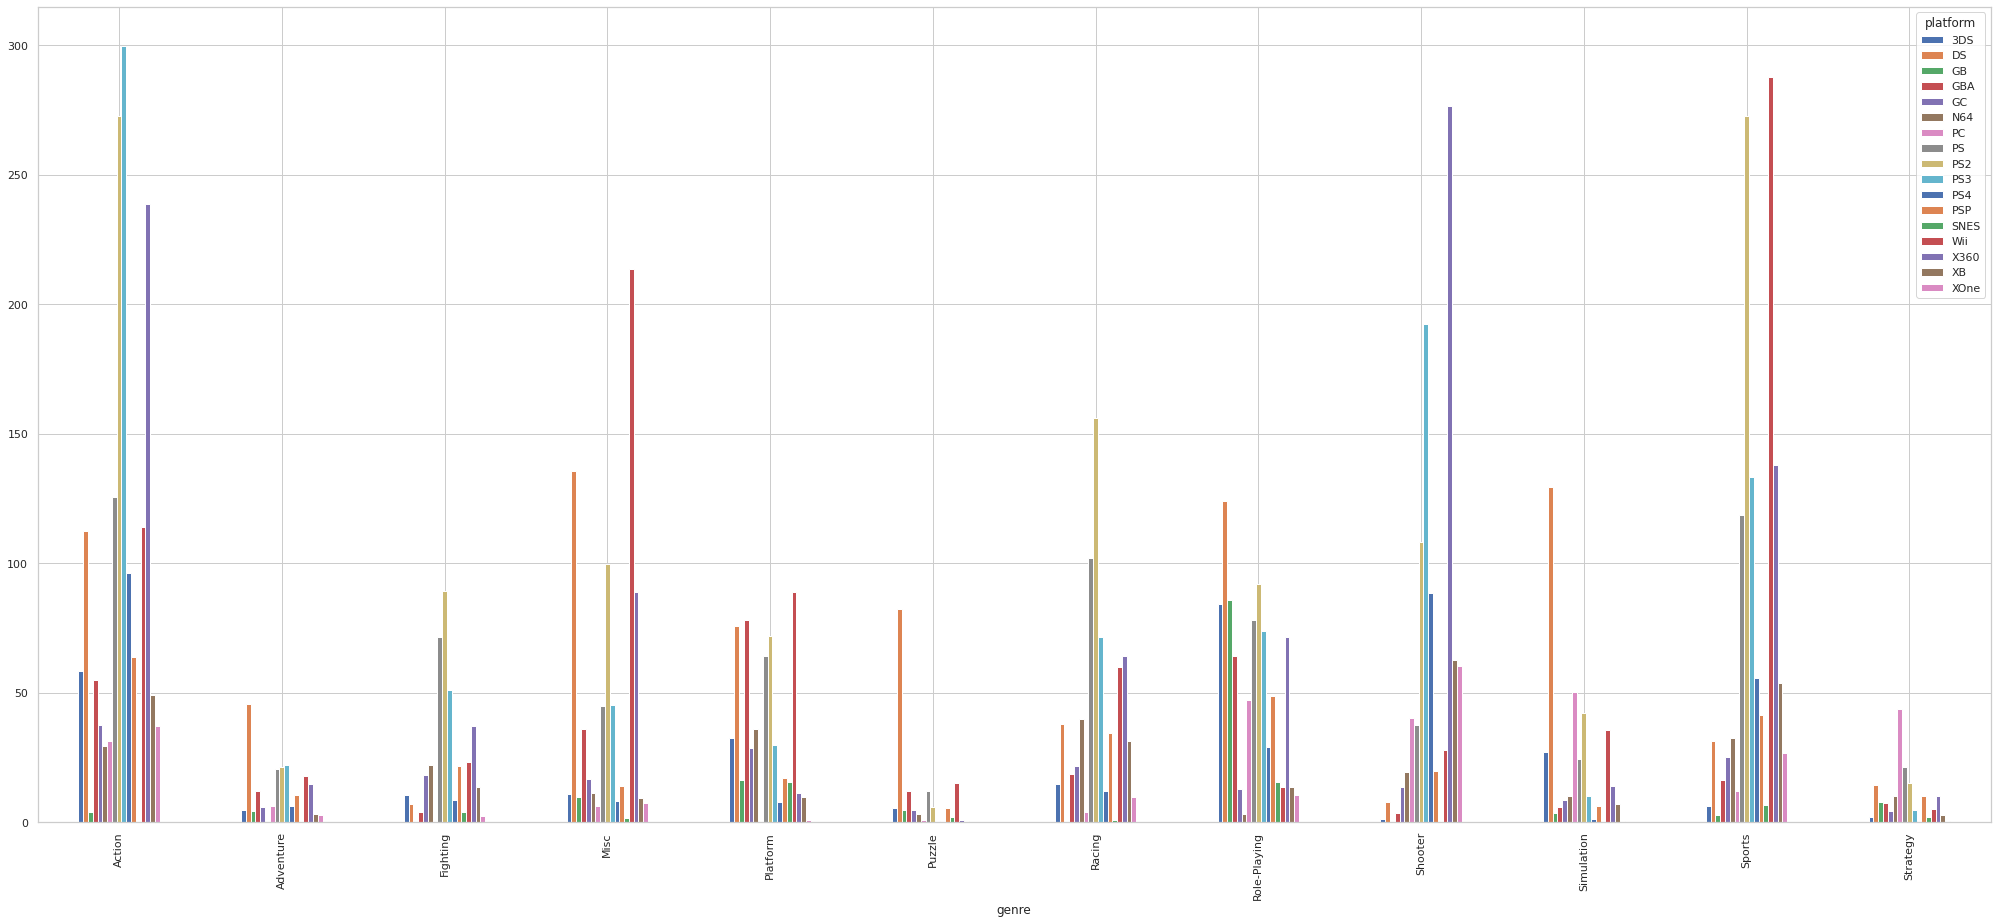

In [350]:
total_sales_genre = games2.pivot_table(index = ['genre'],columns = 'platform', values = 'total_sales', aggfunc = 'sum')
total_sales_genre.plot(kind = 'bar', figsize = (35,15))
plt.show()

Analizando, podemos observar ahora más a pronfundidad exactamente que plaformas vendieron más de que videojuegos. 

Por ejemplo, en los juegos de acció  el lides es el PS3, vendiendo más de 300M, seguido del PS2 y del Xbox 360.

Así mismo, en los juegos de deportes, las plataformas lideres fueron el Wii y el PS2.

En los juegos de tiro, vemos una preferencia por el Xbox 360, generando ventas al rededor de los 280M seguido por la PC, con unas ventas cercanas a ñas 190M.

Ahora bien en los juegos de Role-Play, no hay un claro fvarito, varias plataformas están en torno a los 100m de ventas.

Por último en los juegos de MIsct, vemos que la plataforma que más ventas generó fué el Wii, con unos 220M

**Conclusión intermedia**

Como podemos ver, cada género, tiene un favorito en lo que a plataforma se refiere, la cual es la que egenera más ventas de según que genero se este hablando. 

Se puede decir que dependiendo del género de lso videojuegos, podemos tener una buena nociión de si será exitoso o no el mismo, ya que más alla de casos aislados, es un hecho que hay unos que gustan más que otros, así como plataformas mejor diseñadas para jugar estos.

Estos son temas bastante relevates a la hora de poder reaizar un estudio de mercado apropiado, y saber si a determinada consola le conviene sacar determinado juego.

### Perfil de usuario por región

A continuación haremos un modelo por región que nos permita saber los volumnes de venta, , plataformas y generos más pupulares.

Primeramente buscamos el columen de venta en el top 5 plataformas de Norteamérica.

In [351]:
games_na_platform = games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
games_na_platform.head()

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


Como podemos ver, la más vendida es el X360 con 602M de ventas, seguida del PS2 con casi 600M, luego el Wii, el PS3 y el DS, siendo este el que menos volumne tiene con 382M de ventas

A continuación tenemos a Europa

In [352]:
games_eu_platform = games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
games_eu_platform.head()

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


En europa tenemos casi las mismas platafomras en diferente oden. Algo que podems notoar, es que el volumen de vents en Europa es practicamegte el 50% del de Norte américa, dand a entender que e sun mercadio mpás reducido donde estos videojuegos no se comercializan tanto como allá. 

Por último estudiamos a Japón

In [353]:
games_jp_platform = games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
games_jp_platform.head()

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


En Japón vemos que la tendencia va por el DS seguido de la PS y el PS2, y aquí las ventas son casi el 50% de las de europa, practicamente el 25% de las de Norteamérica, siendo un mercado aún más reducido y con gusos un tanto diferenes a los anteriores. 

Ahora se estudian los generos más pupulares y las ventsa qeu generan.

Primeramente Norteamérica.

In [354]:
games_na_genre = games.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
games_na_genre.head()

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


Se evicdencia como los juegos de Acción, vendieron unos 879M, seguido de los juegos de deportes, tiro, plataforma y misticos.

Estudiando Europa

In [355]:
games_eu_genre = games.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
games_eu_genre.head()

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


Vemos que practicamente son los mismos juegos, de nuevo practicamente el volumen de ventas es del 50% a comparación de Norteamérica, y el único que cambia de posición son los de carrera en lugar de plataforma.

Por último Japón.

In [356]:
games_jp_genre = games.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
games_jp_genre.head()

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


Vemos como sigue siendo el de menor valumen de ventas, y que el juego que más les gusta es el de Role-play, de resto las posiciones se mantienen igual.

Por último, es necesario identificar que tan relevante es el `ESRB` en cada región, y el número de ventas que genera.

In [357]:
games.loc[:,['eu_sales',	'jp_sales',	'na_sales','rating']].pivot_table(index = 'rating', aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,710.25,198.11,1292.99
E10+,188.52,40.20,353.32
EC,0.11,0.00,1.53
K-A,0.27,1.46,2.56
M,483.97,64.24,748.48
RP,0.08,0.00,0.00
T,427.03,151.40,759.75


Como se evidencia, los juego más vendidos como es de esperar, son los que están menos restringidos y con más acceso a todo público que en este caso es la letra E, seguidos de la M y la T, el resto son categorías un tanto más específicas, por lo que el público y ventas es más reducido también.

**Conclusión intermedia**

Como se observa, existen unas ventas mucho mayores en lo que a Norteamérica se refiere, seguido de Europa y continuando con Japón, al contrario de lo que se piensa, ya que lo más evidente en un principio era que los paises asiaticos tomaran la delantera en este tema. Vemos como En cuanto a plataformas si hay un poco de discrepancia entre regiones, sin embargo, los generos má jugados son practicamanete los mimsos en todos los lugares.

### Formulación de hipótesis

Finalmente, lo que se quiere es dar respuesta a 2 hipótesis para poder determinar si las mismas deben ser rechazadas o no, en base a lo que la empresa solicita en este caso.

Primeramente la empresa hace alusión a que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.Ya que según lo que han visto en sus resultados, consideran que este debe ser el camino, sin embargo necitan confirmar.

Así mismo, también desea determinar si Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas. Ya que esto es de suma importancia para saber hacia donde dirigir sus nuevos desarrollo.

Para ello, se crea una funció que permite determinar la hipótesis 

In [358]:
def hipotesis_nula_muestras(L1, L2, rel = True):

  alpha = 0.05
  if rel == True:
    results = st.ttest_rel(L1, L2) 
  else:
    results = st.ttest_ind(L1, L2)
  print('p-value: ', results.pvalue) 
  if results.pvalue < alpha:     
    print("Rechazamos la hipótesis nula") 
  else:     
    print("No rechazamos la hipótesis nula") 

Primeramente, determinamos cuales son las plataformas a estudiar y el score que los usuarios le handado a los juegos tanto de PC como de Xbox

In [359]:
Xbox_games = games[games['platform'] == 'XOne']
Xbox_games = Xbox_games[(Xbox_games['user_score'] != 'tbd') & (Xbox_games['year_of_release'] >= 1995)]['user_score'].reset_index(drop=True)

In [360]:
PC_games = games[games['platform'] == 'PC']
PC_games = PC_games[(PC_games['user_score'] != 'tbd') & (PC_games['year_of_release'] >= 1995)]['user_score'].reset_index(drop=True)

Nos aseguramos que el tamaño de las listas sean las mismas.

In [361]:
print(len(Xbox_games))
print(len(PC_games.loc[:181]))

182
182


Para determinar la veracidad de la hipótesis nula, al las muestras no ser iguales, y depender de personas qeu seguramente tienen gustos distintos, y personas distintas, aplicamos `ttest_ind`

In [362]:
hipotesis_nula_muestras(Xbox_games.astype(float), PC_games.loc[:181].astype(float), rel = False)

p-value:  0.0021112167902660258
Rechazamos la hipótesis nula


Como podemos ver, la hipótesis nula fué rechazada, por lo que se puede decir que lo más probable es que las calificaciones promedio de los juegos de cada plataforma varian, por lo que una de ellas tiende a ser más exitosa que la otra. siendo entonces la hipótesis laternativa:

* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes entre si.

Ahora se procede a demostrar la siguiente hipótesis nula. Para ello buscamos cuales son las calificaciones de los usuarios para los juegos de acción y deportes.

In [363]:
ation_games = games[games['genre'] == 'Action']
ation_games = ation_games[(ation_games['user_score'] != 'tbd')&(ation_games['year_of_release'] >= 1995)]['user_score'].reset_index(drop=True)

In [364]:
sports_games = games[games['genre'] == 'Sports']
sports_games = sports_games[(sports_games['user_score'] != 'tbd')&(sports_games['year_of_release'] >= 1995)]['user_score'].reset_index(drop=True)

Se verifica que el tamaño de las listas sean las mismas

In [365]:
print(len(ation_games.loc[:1102]))
print(len(sports_games))

1103
1098


Comprobabmos la hipótesis

In [366]:
hipotesis_nula_muestras(ation_games.loc[:1102].astype(float), sports_games.astype(float), rel = False)

p-value:  2.3320197635310492e-05
Rechazamos la hipótesis nula


Como podemos ver, también fué rechazada, haciendo alusión a que también lo más probable es que las claifcaciones de los usuarios para cada tipo de juego son diferentes en promedio. siendo entonces la hipótesis alternativa:

* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Conclusión general

Priomeramente se creó una columna que nos dá el total de ingresos de los videojuegos, información que será de mucha utilizadad y necesidad para el resto del anaálisis.

Como podemos ver, cada género, tiene un favorito en lo que a plataforma se refiere, la cual es la que egenera más ventas de según que genero se este hablando. 

Se puede decir que dependiendo del género de lso videojuegos, podemos tener una buena nociión de si será exitoso o no el mismo, ya que más alla de casos aislados, es un hecho que hay unos que gustan más que otros, así como plataformas mejor diseñadas para jugar estos.

Estos son temas bastante relevates a la hora de poder reaizar un estudio de mercado apropiado, y saber si a determinada consola le conviene sacar determinado juego.

Como se observa, existen unas ventas mucho mayores en lo que a Norteamérica se refiere, seguido de Europa y continuando con Japón, al contrario de lo que se piensa, ya que lo más evidente en un principio era que los paises asiaticos tomaran la delantera en este tema. Vemos como En cuanto a plataformas si hay un poco de discrepancia entre regiones, sin embargo, los generos má jugados son practicamanete los mimsos en todos los lugares.

Por último, se puede decir que al querer comprobar las hipotesis nulas nos arrojo que alternativamente:

* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes entre si.

* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.